In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [44]:
label=["CSI_Value"]
dataset=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Sitting/Sitting_room_Row_CSI.csv",names=label)
dataset.head(-10)

,CSI_Value
0,0
1,-0.0004883-0.0004883i
2,-0.00097659-0.0014954i
3,0.0004883-0.0004883i
4,-0.00097659
...,...
5479,-0.0004883+0.0004883i
5480,0-0.0004883i
5481,0-0.0004883i
5482,-0.0004883+0.00045778i


In [6]:
dataset.isnull().sum() # To check the null value in dataset

Time_stamp    0
CSI_Value     0
dtype: int64

In [45]:
X=dataset.values
lis=X.tolist()
print(X[49])
# print(lis)


['0.0004883']


In [46]:
lis1=[]
k=-1
for i in lis:
    k+=1
    for s in lis[k]:
        s = s.replace('i', 'j')
        v = complex(s)
        lis1.append(v)


In [47]:
print(lis1[49])

(0.0004883+0j)


# Extract Amplitude, Phase information

In [48]:
amplitudes=[]
for i in lis1:
    amp=abs(i)*1000 # Scale-up by 100 unit
    amplitudes.append(amp)

In [49]:
print(amplitudes[:50])
print("\nMaximum amplitude value=",max(amplitudes))


[0.0, 0.6905604825067824, 1.7860428852913919, 0.6905604825067824, 0.9765900000000001, 0.4883, 0.6905604825067824, 0.4883, 0.6905604825067824, 0.9765900000000001, 0.4883, 0.030518999999999998, 0.6905604825067824, 0.030518999999999998, 0.51881, 0.030518999999999998, 0.4883, 0.4883, 0.4883, 0.6905604825067824, 0.030518999999999998, 0.6905604825067824, 0.6905604825067824, 0.9765900000000001, 0.0, 0.0, 0.4883, 0.030518999999999998, 0.6905604825067824, 0.6905604825067824, 0.030518999999999998, 1.0646526827562124, 0.4883, 0.4883, 1.091863049150396, 0.9765900000000001, 0.6905604825067824, 0.6905604825067824, 1.0785594821334612, 0.45778, 0.9765900000000001, 0.030518999999999998, 0.9765900000000001, 1.0785594821334612, 0.6905604825067824, 0.4883, 0.4883, 0.030518999999999998, 0.0, 0.4883]

Maximum amplitude value= 2.0133124769891038


In [50]:

import csv
with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Sitting/Sitting_room_Row_CSI.csv",'r') as csvinput:
    with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Sitting/Sitting_room_Amp.csv", 'w') as csvoutput:
        writer = csv.writer(csvoutput)
        i=0
        for row in csv.reader(csvinput):
            row.append(amplitudes[i])
            writer.writerow(row)
            i+=1
#             print(row)
            

In [51]:
label=["CSI_Value","Amplitude_m"]
df_amp=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Sitting/Sitting_room_Amp.csv",names=label)
df_amp.head(-10)

,CSI_Value,Amplitude_m
0,0,0.000000
1,-0.0004883-0.0004883i,0.690560
2,-0.00097659-0.0014954i,1.786043
3,0.0004883-0.0004883i,0.690560
4,-0.00097659,0.976590
...,...,...
5479,-0.0004883+0.0004883i,0.690560
5480,0-0.0004883i,0.488300
5481,0-0.0004883i,0.488300
5482,-0.0004883+0.00045778i,0.669328


# Extract Phase information

In [52]:
# importing "cmath" for complex number operations

import cmath

phases=[]
for i in lis1:
    out_phase=cmath.phase(i)
    phases.append(out_phase)

In [53]:
print(phases[0:50])
print("\nMaximum phase value=",max(phases))

[0.0, -2.356194490192345, -2.1493215935875827, -0.7853981633974483, 3.141592653589793, 3.141592653589793, 0.7853981633974483, 3.141592653589793, -2.356194490192345, 3.141592653589793, 1.5707963267948966, 3.141592653589793, -0.7853981633974483, 3.141592653589793, -1.5707963267948966, -1.5707963267948966, 1.5707963267948966, 3.141592653589793, 0.0, 2.356194490192345, -1.5707963267948966, -2.356194490192345, 0.7853981633974483, 3.141592653589793, 0.0, 0.0, -1.5707963267948966, -1.5707963267948966, -2.356194490192345, -2.356194490192345, -1.5707963267948966, -0.4764722658737872, 3.141592653589793, -1.5707963267948966, -1.1071446219178187, -1.5707963267948966, 0.7853981633974483, -0.7853981633974483, -1.132456881129393, 1.5707963267948966, 1.5707963267948966, 3.141592653589793, 3.141592653589793, 0.4383394456655038, 0.7853981633974483, 3.141592653589793, 1.5707963267948966, -1.5707963267948966, 0.0, 0.0]

Maximum phase value= 3.141592653589793


In [54]:

with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Sitting/Sitting_room_Amp.csv",'r') as csvinput:
    with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Sitting/Sitting_room_Phase.csv", 'w') as csvoutput:
        writer = csv.writer(csvoutput)
        i=0
        for row in csv.reader(csvinput):
            row.append(phases[i])
            writer.writerow(row)
            i+=1
#            print(row)
            

In [ ]:
# dataset_amp=np.array(amplitudes)
# data_len = dataset_amp.shape[0]
# print(dataset_amp)

In [55]:
label=["CSI Value","Amplitude_m", "Phase_rad"]
final_dataset=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Sitting/Sitting_room_Phase.csv",names=label)

final_dataset.head(-10)

,CSI Value,Amplitude_m,Phase_rad
0,0,0.000000,0.000000
1,-0.0004883-0.0004883i,0.690560,-2.356194
2,-0.00097659-0.0014954i,1.786043,-2.149322
3,0.0004883-0.0004883i,0.690560,-0.785398
4,-0.00097659,0.976590,3.141593
...,...,...,...
5479,-0.0004883+0.0004883i,0.690560,2.356194
5480,0-0.0004883i,0.488300,-1.570796
5481,0-0.0004883i,0.488300,-1.570796
5482,-0.0004883+0.00045778i,0.669328,2.388443


# Activity: Walking, Standing, Sitting, Get_down, Get_up, No_Person 

In [56]:
import csv
with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Sitting/Sitting_room_Phase.csv",'r') as csvinput:
    with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Sitting/Sitting_room_Activity.csv", 'w') as csvoutput:
        writer = csv.writer(csvoutput)
        i=0
        for row in csv.reader(csvinput):
            row.append("Sitting")
            writer.writerow(row)
            i+=1


In [57]:
label=["CSI Value","Amplitude_m", "Phase_rad","Activity"]
final_dataset=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Sitting/Sitting_room_Activity.csv",names=label)

final_dataset.head(-10)

,CSI Value,Amplitude_m,Phase_rad,Activity
0,0,0.000000,0.000000,Sitting
1,-0.0004883-0.0004883i,0.690560,-2.356194,Sitting
2,-0.00097659-0.0014954i,1.786043,-2.149322,Sitting
3,0.0004883-0.0004883i,0.690560,-0.785398,Sitting
4,-0.00097659,0.976590,3.141593,Sitting
...,...,...,...,...
5479,-0.0004883+0.0004883i,0.690560,2.356194,Sitting
5480,0-0.0004883i,0.488300,-1.570796,Sitting
5481,0-0.0004883i,0.488300,-1.570796,Sitting
5482,-0.0004883+0.00045778i,0.669328,2.388443,Sitting


In [58]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5494 entries, 0 to 5493
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CSI Value    5494 non-null   object 
 1   Amplitude_m  5494 non-null   float64
 2   Phase_rad    5494 non-null   float64
 3   Activity     5494 non-null   object 
dtypes: float64(2), object(2)
memory usage: 171.8+ KB


<AxesSubplot:title={'center':'Total number of sample Vs Activity'}>

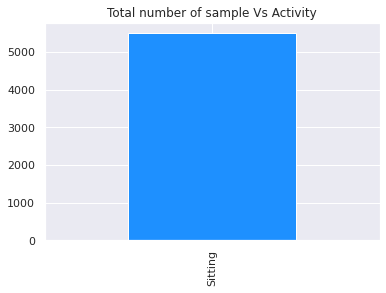

In [59]:
sns.set(color_codes=True)
final_dataset['Activity'].value_counts().plot(kind='bar',color="dodgerblue",title='Total number of sample Vs Activity')


# Final Dataset preparation

In [108]:
import csv
row_csi=[]
csi_amp=[]
csi_phs=[]
csi_activity=[]
with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Sitting/Sitting_room_Phase.csv",'r') as csvinput:    
        for row in csv.reader(csvinput):
            row_csi.append(row[0])
            csi_amp.append(row[1])
            csi_phs.append(row[2])
            csi_activity.append("Sitting")
            
print("All data append in list successfully")            
           

All data append in list successfully


In [123]:
# print(csi_amp)

In [121]:


df=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/All_Activity_room.csv")

df.head(-10)

,CSI_Value,Amplitude_m,Phase_rad,Activity
0,0.0004883+0.0004883i,0.690560,0.785398,Walking
1,0-0.0004883i,0.488300,-1.570796,Walking
2,0.00045778+0.0004883i,0.669328,0.817646,Walking
3,0.0004883-0.0004883i,0.690560,-0.785398,Walking
4,0-3.0519e-05i,0.030519,-1.570796,Walking
...,...,...,...,...
112485,0.0004883-0.00051881i,0.712461,-0.815684,Walking
112486,0.00045778,0.457780,0.000000,Walking
112487,-0.0004883-0.0004883i,0.690560,-2.356194,Walking
112488,0,0.000000,0.000000,Walking


In [125]:

# data = {'CSI_Value': row_csi,"Amplitude_m":csi_amp, "Phase_rad":csi_phs, "Activity":csi_activity } #, 'Run':r ,'Wicket': w,'Catch':c 
 
# # Make data frame of above data
# df = pd.DataFrame(data)
 
# # append data frame to CSV file
# df.to_csv('/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/final_dataset.csv', mode='a', index=False, header=False)
 
# # print message

# print("Data appended to final dataset successfully.")


In [126]:
df=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/final_dataset.csv")

df.head(-10)

,CSI_Value,Amplitude_m,Phase_rad,Activity
0,0.0004883+0.0004883i,0.690560,0.785398,Walking
1,0-0.0004883i,0.488300,-1.570796,Walking
2,0.00045778+0.0004883i,0.669328,0.817646,Walking
3,0.0004883-0.0004883i,0.690560,-0.785398,Walking
4,0-3.0519e-05i,0.030519,-1.570796,Walking
...,...,...,...,...
117978,-0.0004883+0.0004883i,0.690560,2.356194,Sitting
117979,0-0.0004883i,0.488300,-1.570796,Sitting
117980,0-0.0004883i,0.488300,-1.570796,Sitting
117981,-0.0004883+0.00045778i,0.669328,2.388443,Sitting
